In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [72]:
df_train = pd.read_csv('C:/Users/Alex/Python Projects/Data/train.csv')
df_test = pd.read_csv('C:/Users/Alex/Python Projects/Data/test.csv')
for i in df_test.columns:
    if df_test[i].dtypes == 'object':
        df_train[i] = df_train[i].fillna('None')
        df_test[i] = df_test[i].fillna('None')
    else:
        df_train[i] = df_train[i].fillna(0)
        df_test[i] = df_test[i].fillna(0)

In [73]:
df_train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


In [74]:
list_dummy = []
list_drop = []
for i in df_train.columns:
    if len(pd.unique(df_train[i])) <= 114:
        print("Column {} of type {} has {} different entries, column name added to list.".format(i, df_train[i].dtypes, len(pd.unique(df_train[i]))))
        list_dummy = list_dummy + [i]
    else:
        print("Column {} of type {} has {} different entries, too many.".format(i, df_train[i].dtypes, len(pd.unique(df_train[i]))))
        list_drop = list_drop + [i]
for i in list_dummy:
    if df_train[i].dtypes == 'object':
        df_dummies_train = pd.get_dummies(df_train[i], prefix=i, prefix_sep='_')
        df_train = pd.concat([df_train, df_dummies_train], axis=1)
        df_train = df_train.drop([i], axis=1)
for i in list_dummy:
    if df_test[i].dtypes == 'object':
        df_dummies_test = pd.get_dummies(df_test[i], prefix=i, prefix_sep='_')
        df_test = pd.concat([df_test, df_dummies_test], axis=1)
        df_test = df_test.drop([i], axis=1)

Column Id of type int64 has 1460 different entries, too many.
Column MSSubClass of type int64 has 15 different entries, column name added to list.
Column MSZoning of type object has 5 different entries, column name added to list.
Column LotFrontage of type float64 has 111 different entries, column name added to list.
Column LotArea of type int64 has 1073 different entries, too many.
Column Street of type object has 2 different entries, column name added to list.
Column Alley of type object has 3 different entries, column name added to list.
Column LotShape of type object has 4 different entries, column name added to list.
Column LandContour of type object has 4 different entries, column name added to list.
Column Utilities of type object has 2 different entries, column name added to list.
Column LotConfig of type object has 5 different entries, column name added to list.
Column LandSlope of type object has 3 different entries, column name added to list.
Column Neighborhood of type obje

In [76]:
y_label = np.log(df_train['SalePrice'])
df_train = df_train.drop('SalePrice', axis=1)

In [77]:
for i in df_train.columns:
    if i not in df_test.columns:
        print("not in Test:",i)
        df_test[i] = 0
        
for j in df_test.columns:
    if j not in df_train.columns:
        print("not in Train:",j)
        df_train[j] = 0

not in Test: Utilities_NoSeWa
not in Test: Condition2_RRAe
not in Test: Condition2_RRAn
not in Test: Condition2_RRNn
not in Test: HouseStyle_2.5Fin
not in Test: RoofMatl_ClyTile
not in Test: RoofMatl_Membran
not in Test: RoofMatl_Metal
not in Test: RoofMatl_Roll
not in Test: Exterior1st_ImStucc
not in Test: Exterior1st_Stone
not in Test: Exterior2nd_Other
not in Test: Heating_Floor
not in Test: Heating_OthW
not in Test: Electrical_Mix
not in Test: Electrical_None
not in Test: GarageQual_Ex
not in Test: PoolQC_Fa
not in Test: MiscFeature_TenC
not in Train: MSZoning_None
not in Train: Utilities_None
not in Train: Exterior1st_None
not in Train: Exterior2nd_None
not in Train: KitchenQual_None
not in Train: Functional_None
not in Train: SaleType_None


In [78]:
print(df_train.shape)
print(df_test.shape)

(1460, 311)
(1459, 311)


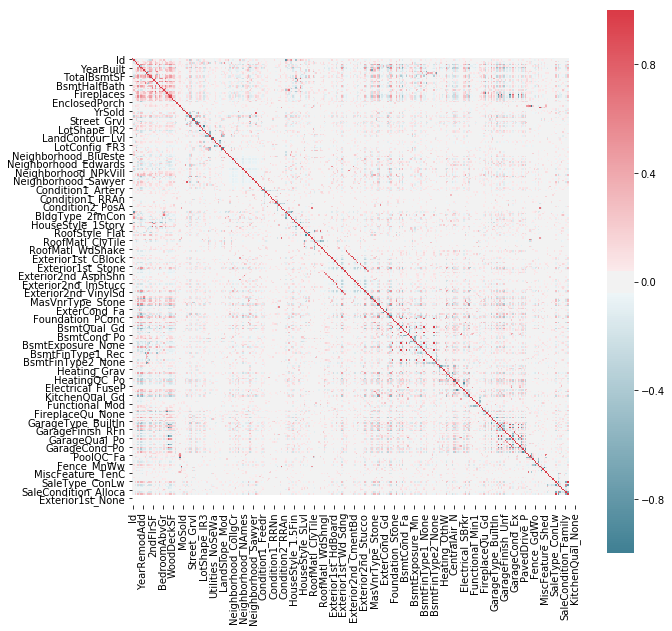

In [79]:
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 10))
corr = df_train.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [80]:
from sklearn import preprocessing

x = df_train.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_train = pd.DataFrame(x_scaled, columns=df_train.columns)

In [81]:
x_test = df_test.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x_test)
df_test = pd.DataFrame(x_scaled, columns=df_test.columns)

In [82]:
df_train.head(3)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,MSZoning_None,Utilities_None,Exterior1st_None,Exterior2nd_None,KitchenQual_None,Functional_None,SaleType_None
0,0.000000,0.235294,0.207668,0.033420,0.666667,0.500,0.949275,0.883333,0.12250,0.125089,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000685,0.000000,0.255591,0.038795,0.555556,0.875,0.753623,0.433333,0.00000,0.173281,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.001371,0.235294,0.217252,0.046507,0.666667,0.500,0.934783,0.866667,0.10125,0.086109,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [83]:
df_train = df_train.drop('Id', axis=1)
df_test = df_test.drop('Id', axis=1)

Text(0,0.5,'rmse')

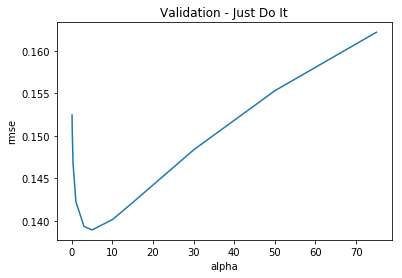

In [84]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, df_train, y_label, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)
model_ridge = Ridge()
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation - Just Do It", figsize=(6,4))
plt.xlabel("alpha")
plt.ylabel("rmse")

Lasso picked 116 variables and eliminated the other 194 variables


Text(0.5,1,'Coefficients in the Lasso Model')

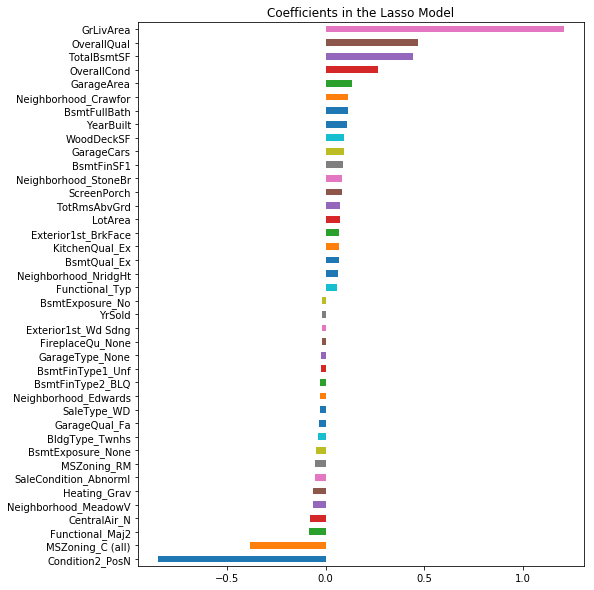

In [86]:
model_lasso = LassoCV(alphas = [1000, 500, 100, 10, 1, 0.1, 0.001, 0.0005]).fit(X_train, y_train)
rmse_cv(model_lasso).mean()
coef = pd.Series(model_lasso.coef_, index = X_train.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")
imp_coef = pd.concat([coef.sort_values().head(20),
                     coef.sort_values().tail(20)])
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

In [293]:
select_feature_opti = ['GrLivArea',
 'LotArea',
 'BsmtUnfSF',
 'BsmtFinSF1',
 '1stFlrSF',
 'TotalBsmtSF',
 'GarageArea',
 'MasVnrArea',
 'GarageYrBlt',
 'OpenPorchSF',
 'YearRemodAdd',
 'YearBuilt',
 'LotFrontage',
 'TotRmsAbvGrd',
 '2ndFlrSF',
 'OverallQual',
 'WoodDeckSF',
 'Fireplaces',
 'MoSold',
 'OverallCond',
 'BedroomAbvGr',
 'ScreenPorch',
 'EnclosedPorch',
 'GarageCars',
 'YrSold',
 'FireplaceQu_None',
 'BsmtFinSF2',
 'FullBath',
 'FireplaceQu_Gd',
 'BsmtFullBath',
 'BsmtExposure_Gd',
 '3SsnPorch',
 'Neighborhood_Crawfor',
 'Neighborhood_NridgHt',
 'KitchenQual_Gd',
 'MSSubClass',
 'SaleCondition_Normal',
 'KitchenAbvGr',
 'Neighborhood_Timber',
 'HouseStyle_1Story',
 'BsmtQual_Ex',
 'KitchenQual_TA',
 'HalfBath',
 'MasVnrType_None',
 'Neighborhood_StoneBr',
 'ExterQual_TA',
 'MasVnrType_Stone',
 'Fence_MnPrv',
 'KitchenQual_Ex',
 'LowQualFinSF',
 'MSZoning_FV',
 'RoofStyle_Hip',
 'GarageType_Attchd',
 'LandContour_Lvl',
 'LotShape_IR1',
 'GarageFinish_Unf',
 'Exterior1st_BrkFace',
 'FireplaceQu_TA',
 'Exterior2nd_VinylSd',
 'LotShape_Reg',
 'GarageType_BuiltIn',
 'GarageType_Detchd',
 'SaleType_New',
 'Exterior2nd_Other',
 'SaleCondition_Abnorml',
 'Neighborhood_BrkSide',
 'BsmtExposure_Av',
 'MiscVal',
 'Neighborhood_NoRidge',
 'Exterior1st_VinylSd',
 'RoofStyle_Gable',
 'LotConfig_CulDSac',
 'Foundation_CBlock',
 'BsmtExposure_Mn',
 'RoofMatl_WdShngl',
 'CentralAir_N',
 'BsmtFinType1_GLQ',
 'HeatingQC_Gd',
 'Neighborhood_NAmes',
 'HouseStyle_2Story',
 'BldgType_TwnhsE',
 'MSZoning_RL',
 'GarageType_2Types',
 'ExterQual_Gd',
 'GarageFinish_Fin',
 'HeatingQC_Ex',
 'Exterior1st_HdBoard',
 'MSZoning_RM',
 'BsmtQual_TA',
 'BsmtQual_Gd']

In [294]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test =  train_test_split(df_train[select_feature_opti], y_label, test_size=0.1)

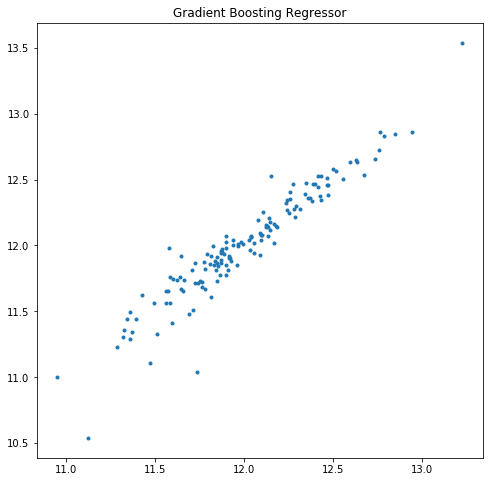

In [295]:
model = GradientBoostingRegressor(loss='ls', learning_rate=0.04, n_estimators=1000, max_features=10, 
                                  verbose=0, random_state=777 )
gbr = model.fit(X_train, y_train)

y_predict = gbr.predict(X_test)

fig = plt.figure(figsize=(8,8))
plt.scatter(y_predict, y_test, marker='.')
plt.title('Gradient Boosting Regressor')
plt.show()

In [296]:
gbr.score(X_test, y_test)

0.9048281992365437

In [287]:
Sample_predict = model.predict(df_test[select_feature_opti])

df_id = pd.read_csv('C:/Users/Alex/Python Projects/Data/test.csv')
list_id_test = np.array(df_id['Id'])
df_export = pd.DataFrame()
df_export['Id'] = list_id_test
df_export['SalePrice'] = np.exp(Sample_predict) + 1
df_export.to_csv('Export.csv', sep=',', index=False)

In [101]:
df_export

,Id,SalePrice
0,1461,116225.357615
1,1462,150449.683691
2,1463,185097.849965
3,1464,204710.389476
4,1465,175420.781217
5,1466,168535.146001
6,1467,161385.508954
7,1468,161433.468480
8,1469,177111.167752
9,1470,132574.280853
